In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
#Remove extra features
df1 = df.drop(['area_type', 'availability', 'balcony', 'society'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
#Check for null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#Drop null values or fill it with median
df2 = df1.dropna()
df2.shape

(13246, 5)

In [11]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
#Cleaning the size feature and keeping only the number
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-13-f37298b81bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
#In bhk only number is present
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
#Removing bhk outliers
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
#Some ranges are present in total_sqft
df2[df2.total_sqft=='1133 - 1384']

,location,size,total_sqft,bath,price,bhk
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
#Range values will not convert into float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
is_float('1440')

True

In [20]:
is_float('1133 - 1384')

False

In [21]:
#Getting all range values
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
#For ranges we will get the average and normal float values will remain as it is
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
convert_sqft_to_num('2600')

2600.0

In [24]:
convert_sqft_to_num('1042 - 1105')

1073.5

In [25]:
convert_sqft_to_num('34.46Sq. Meter')

In [26]:
#Creating new dataframe for total_sqft at float values
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [28]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

In [29]:
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [30]:
df4 = df3.dropna()
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
df4.shape

(13200, 6)

In [32]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [33]:
#Creating price_per_sqft column
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
len(df5.location.unique())

1298

In [35]:
#Outlier detection for location sorting as no of properties in each area in ascending order
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [36]:
#Converting location with lesser no of properties(10) into other
len(location_stats[location_stats<=10])

1047

In [37]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [38]:
len(df5.location.unique())

1287

In [39]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

241

In [40]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [41]:
#Checking the bedrooms which are having sizes abnormaly low
df5[(df5.total_sqft/df5.bhk)<100].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
349,other,3 Bedroom,11.0,3.0,74.0,3,672727.272727
770,other,9 Bedroom,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571


In [42]:
#Removing those entries with bedroom sizes as very low
df6 = df5[~((df5.total_sqft/df5.bhk)<100)]
df6.shape

(13160, 7)

In [43]:
df6.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13160.000000,13160.000000,13160.000000,13160.000000,13160.000000
mean,1558.278323,2.677812,112.240771,2.785106,6666.830652
std,1237.814978,1.274235,149.300013,1.213518,4508.228739
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4262.948207
50%,1275.000000,2.000000,71.500000,3.000000,5425.015738
75%,1675.000000,3.000000,120.000000,3.000000,7285.438507
max,52272.000000,27.000000,3600.000000,27.000000,176470.588235


In [81]:
#Understanding groupby
pk = df6.groupby('location')
pk.first()

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1st Phase JP Nagar,4 BHK,2825.0,4.0,250.00,4,8849.557522
2nd Phase Judicial Layout,3 BHK,1450.0,2.0,50.75,3,3500.000000
2nd Stage Nagarbhavi,4 Bedroom,1500.0,4.0,220.00,4,14666.666667
5th Block Hbr Layout,6 Bedroom,1200.0,6.0,250.00,6,20833.333333
...,...,...,...,...,...,...
Yelahanka,4 BHK,2475.0,4.0,186.00,4,7515.151515
Yelahanka New Town,1 BHK,650.0,1.0,33.00,1,5076.923077
Yelenahalli,2 BHK,1240.0,2.0,47.12,2,3800.000000


In [85]:
pk.get_group('Yelenahalli')

,size,total_sqft,bath,price,bhk,price_per_sqft
432,2 BHK,1240.0,2.0,47.12,2,3800.000000
1203,2 BHK,1200.0,2.0,46.17,2,3847.500000
3858,2 BHK,1159.0,2.0,60.00,2,5176.876618
4176,2 BHK,1056.0,2.0,33.00,2,3125.000000
5211,3 BHK,1600.0,3.0,61.37,3,3835.625000
5455,2 BHK,1260.0,2.0,47.88,2,3800.000000
5756,2 BHK,1090.0,2.0,54.00,2,4954.128440
6187,3 BHK,1500.0,2.0,57.00,3,3800.000000
8325,2 BHK,1175.0,2.0,50.00,2,4255.319149
8677,3 BHK,1650.0,3.0,68.00,3,4121.212121


In [57]:
#For each location removing the outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<(mean+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [58]:
df7 = remove_pps_outliers(df6)
df7.shape

(10931, 7)

In [86]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946
...,...,...,...,...,...,...,...
10926,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10927,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10928,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10929,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [89]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946


In [91]:
#Outliers Removal for the properties having
#Higher prices for less no of bedrooms
#Lower prices for more no of bedrooms

In [119]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, marker='.', color='blue', label='2bhk')
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3bhk')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

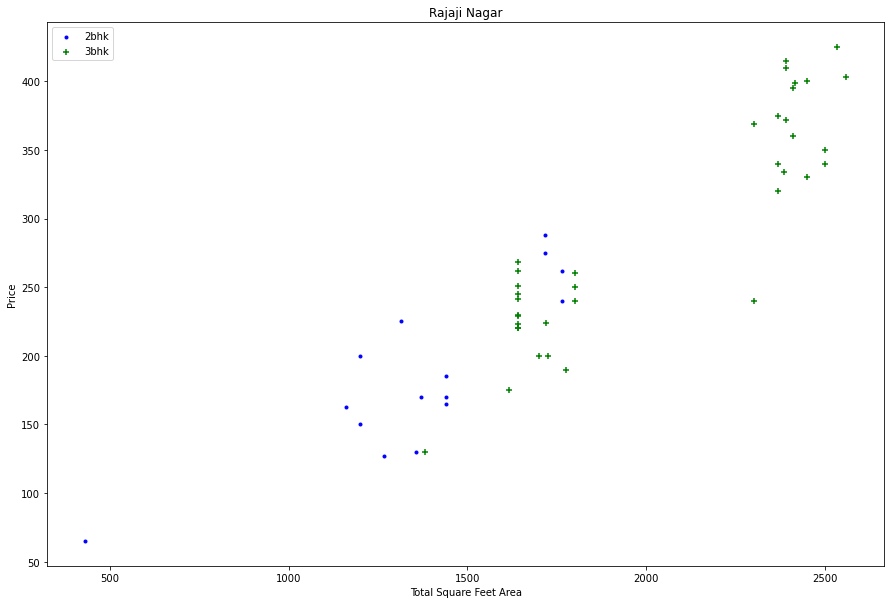

In [120]:
plot_scatter_chart(df7,"Rajaji Nagar")
#At 1700 sqft we can see that price of 2bhk properties are higher than 3bhk

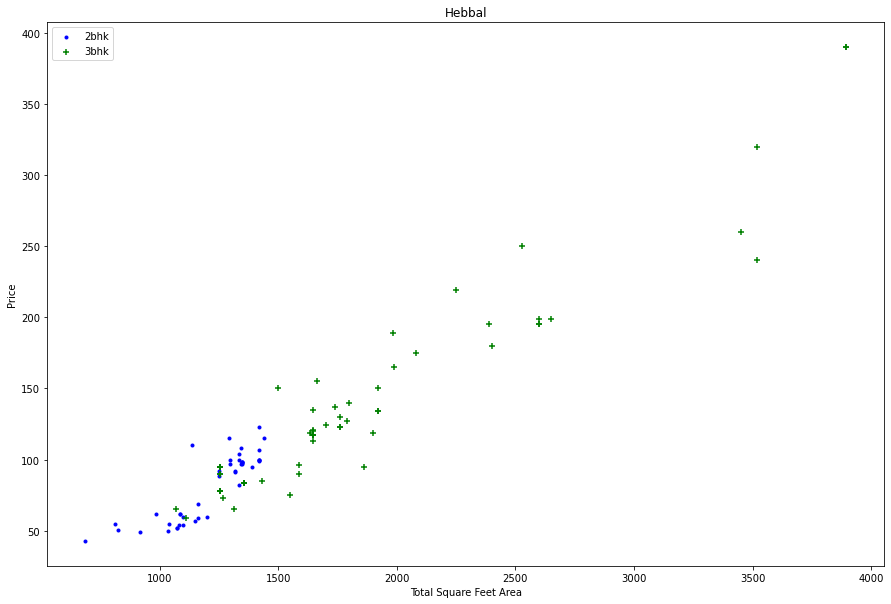

In [121]:
plot_scatter_chart(df7,"Hebbal")

In [128]:
#Removing outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7779, 7)

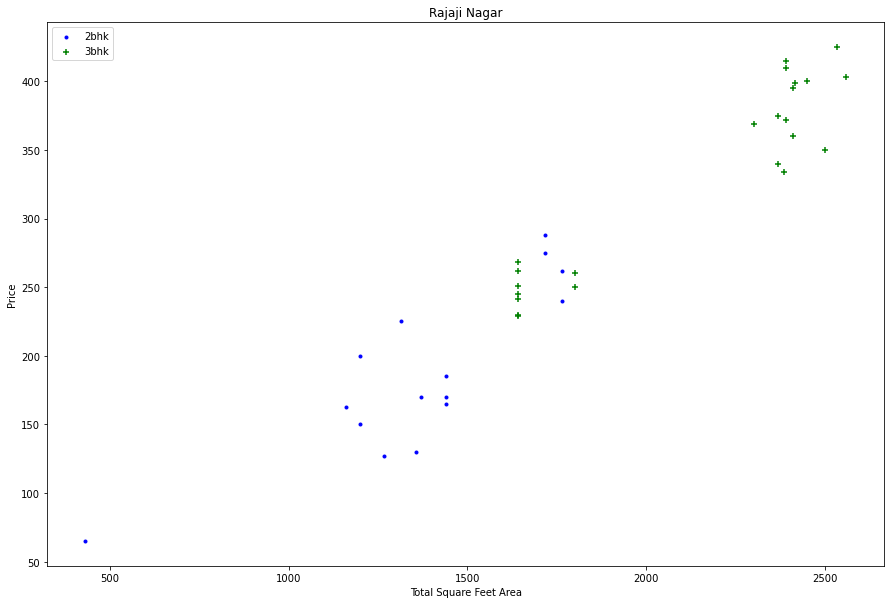

In [129]:
plot_scatter_chart(df8, "Rajaji Nagar")

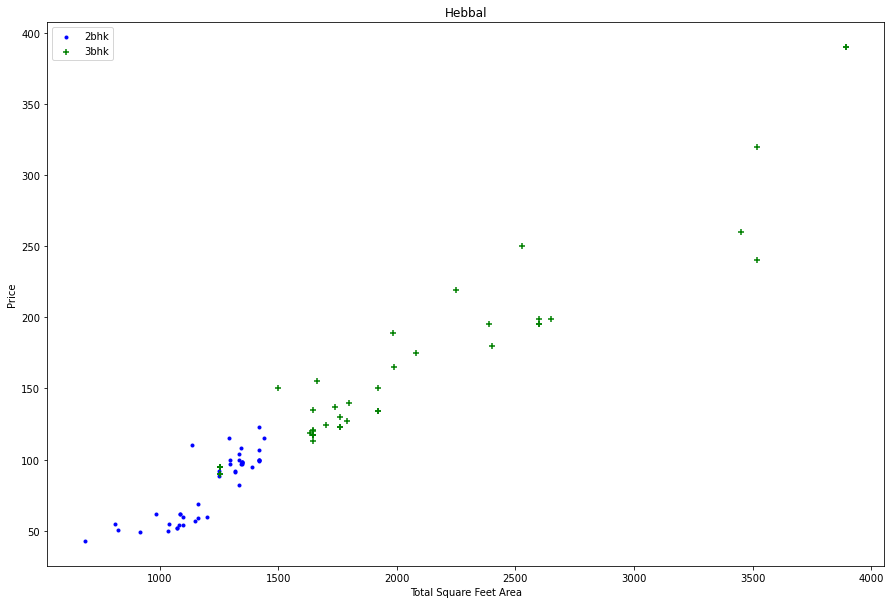

In [130]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

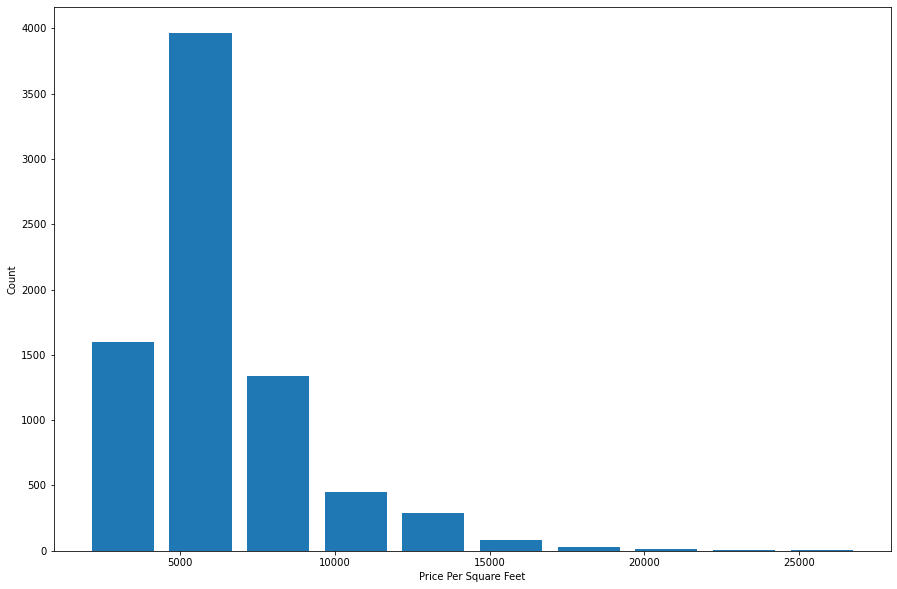

In [134]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [135]:
#Bathroom Outliers
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 27., 11.,
       16., 13.])

In [136]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5640,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8744,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8749,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
8797,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9099,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9906,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10268,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

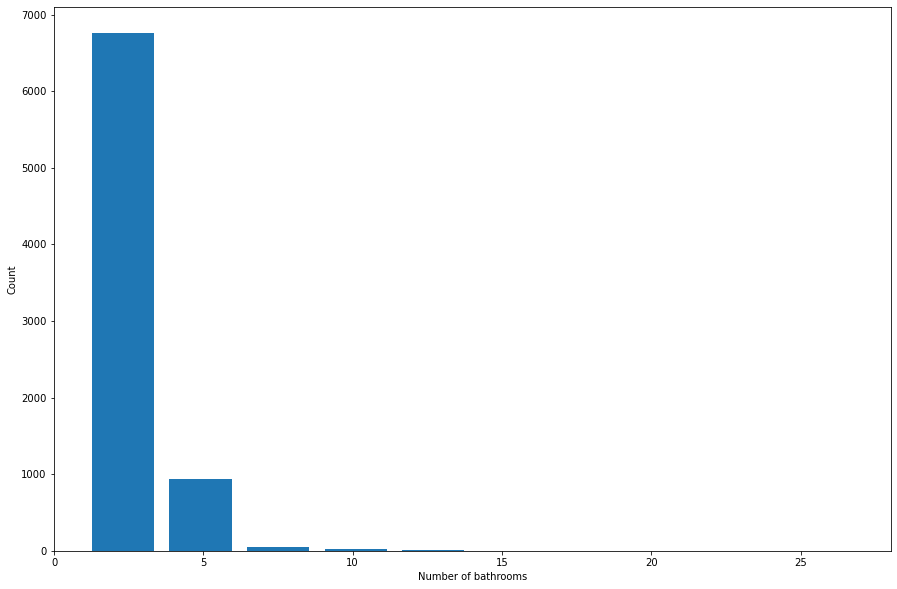

In [137]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [138]:
#Removing properties having bathrooms more than rooms+2
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1770,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5599,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7139,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8797,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
10282,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


In [140]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7693, 7)

In [141]:
#Removing columns which are not required
df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6


In [143]:
#Create dummies
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#Concatenate df10 with dummies
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#Remove location column
df12 = df11.drop('location', axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df12.shape

(7693, 244)

In [147]:
#Independent Variables
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
#Target Variable
y = df12['price']
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [151]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8362299596781793

In [154]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83401041, 0.84430784, 0.83610376, 0.83998353, 0.85432356])

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model':LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [162]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.841746,{'normalize': False}
1,lasso,0.681565,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.685619,"{'criterion': 'mse', 'splitter': 'random'}"


In [165]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]

In [166]:
predict_price("1st Block Jayanagar",2850,4,4)

326.4633642520131

In [168]:
predict_price("1st Phase JP Nagar",1000,2,2)

82.33809223533959

In [169]:
predict_price("1st Phase JP Nagar",1000,3,3)

83.19193431242974

In [170]:
predict_price("Indira Nagar",1000,2,2)

179.32454504665097

In [171]:
predict_price("Indira Nagar",1000,3,3)

180.17838712374112

In [172]:
predict_price("1st Phase JP Nagar",1000,2,3)

82.86291930096714

In [173]:
predict_price("6th Phase JP Nagar",1200,3,3)

79.24712250547023

In [174]:
import pickle
with open('bengaluru_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [175]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))